In [42]:
# imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Needed for decision tree visualization
import pydotplus
from IPython.display import Image
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV


### Import Dataset

In [2]:
# Import
diabetes = pd.read_csv("Resources/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

# Head
diabetes.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


### Columns

In [3]:
diabetes.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

### Column Descriptions
1. Diabetes_binary: 0 = no diabetes 1 = prediabetes or diabetes
2. HighBP: 0 = no high BP 1 = high BP
3. HighChol: 0 = no high cholesterol 1 = high cholesterol
4. CholCheck: 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
5. BMI: Body Mass Index

In [4]:
# Describing the dataset
diabetes.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
# info about the dataset
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [6]:
diabetes.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.381516,0.289213,0.115382,0.293373,0.085999,0.125427,0.211523,-0.158666,-0.054077,...,0.023191,0.040977,0.407612,0.087029,0.213081,0.272646,0.044413,0.278738,-0.170481,-0.224449
HighBP,0.381516,1.000000,0.316515,0.103283,0.241019,0.087438,0.129060,0.210750,-0.136102,-0.040852,...,0.035764,0.026517,0.320540,0.064294,0.173922,0.234784,0.040819,0.338132,-0.141643,-0.187657
HighChol,0.289213,0.316515,1.000000,0.085981,0.131309,0.093398,0.099786,0.181187,-0.090453,-0.047384,...,0.031532,0.033199,0.237778,0.083881,0.142610,0.162043,0.017324,0.240338,-0.084386,-0.107777
CholCheck,0.115382,0.103283,0.085981,1.000000,0.045648,-0.004331,0.022529,0.043497,-0.008249,0.017384,...,0.106800,-0.062669,0.059213,-0.010660,0.034540,0.044430,-0.007991,0.101743,-0.008695,0.007550
BMI,0.293373,0.241019,0.131309,0.045648,1.000000,0.011551,0.022931,0.060355,-0.170936,-0.084505,...,-0.013417,0.065832,0.267888,0.104682,0.161862,0.246094,0.000827,-0.038648,-0.100233,-0.124878
Smoker,0.085999,0.087438,0.093398,-0.004331,0.011551,1.000000,0.064658,0.124418,-0.079823,-0.074811,...,-0.012939,0.035799,0.152416,0.091257,0.120698,0.119789,0.112125,0.105424,-0.140966,-0.104725
Stroke,0.125427,0.129060,0.099786,0.022529,0.022931,0.064658,1.000000,0.223394,-0.079985,-0.008996,...,0.006484,0.036198,0.189447,0.087303,0.164488,0.192266,0.003822,0.123879,-0.073926,-0.136577
HeartDiseaseorAttack,0.211523,0.210750,0.181187,0.043497,0.060355,0.124418,0.223394,1.000000,-0.098223,-0.019436,...,0.015687,0.036029,0.275868,0.075057,0.198416,0.232611,0.098161,0.221878,-0.096559,-0.146748
PhysActivity,-0.158666,-0.136102,-0.090453,-0.008249,-0.170936,-0.079823,-0.079985,-0.098223,1.000000,0.133813,...,0.027089,-0.063302,-0.273548,-0.130090,-0.234500,-0.276868,0.051753,-0.100753,0.190271,0.196551
Fruits,-0.054077,-0.040852,-0.047384,0.017384,-0.084505,-0.074811,-0.008996,-0.019436,0.133813,1.000000,...,0.029385,-0.045843,-0.098687,-0.062102,-0.048572,-0.050784,-0.088723,0.061096,0.098715,0.079009


In [7]:
# dropping columns that may not be helpful for analysis, heavy alcohol consumption removed since because it is self reported it may not be as honest
columns_to_drop = ['Fruits', 'Veggies', 'MentHlth', 'NoDocbcCost', 'Sex', 'AnyHealthcare', 'HvyAlcoholConsump', 'Smoker']
diabetes_df = diabetes.copy()
diabetes_df = diabetes_df.drop(columns=columns_to_drop)
diabetes_df.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,3.0,30.0,0.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,3.0,0.0,0.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,10.0,0.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,0.0,0.0,1.0,3.0,3.0,0.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,0.0,0.0,1.0,2.0,0.0,0.0,8.0,5.0,8.0


### Feature Grouping (using functions)

#### Age
1. Age 18 to 24
2. Age 25 to 29
3. Age 30 to 34
4. Age 35 to 39
5. Age 40 to 44
6. Age 45 to 49
7. Age 50 to 54
8. Age 55 to 59
9. Age 60 to 64
10. Age 65 to 69
11. Age 70 to 74
12. Age 75 to 79
13. Age 80 or older

#### split every three groups
#### 1 = 18-34 (1-3), 2 = 35-49 (4-6), 3 = 50-64 (7-9), 4 = 65-79 (10-12), 5 = 80+ (13) 

In [8]:
diabetes_df['Age'].value_counts()

Age
10.0    10856
9.0     10112
8.0      8603
11.0     8044
7.0      6872
13.0     5426
12.0     5394
6.0      4648
5.0      3520
4.0      2793
3.0      2049
2.0      1396
1.0       979
Name: count, dtype: int64

In [9]:
# def age_replace(x):
#     if x >= 1 and x <= 3:
#         return "Age 18-34"
#     elif x > 3 and x <= 6:
#         return "Age 35-49"
#     elif x > 6 and x <= 9:
#         return "Age 50-64"
#     elif x > 9 and x <= 12:
#         return "Age 65-79"
#     elif x > 12:
#         return "Age 80+"

In [10]:
# diabetes_df['Age'] = diabetes_df['Age'].apply(age_replace)
# diabetes_df['Age'].value_counts()

#### EDUCATION
1. Never attended school or only kindergarten
2. Grades 1 through 8 (Elementary)
3. Grades 9 through 11 (Some high school)
4. Grade 12 or GED (High school graduate)
5. College 1 year to 3 years (Some college or technical school)
6. College 4 years or more (College graduate)

#### split between : higher vs non-higher edu, 5-6 higher, 1-4 lower

In [11]:
# def edu_replace(x):
#     if x >= 1 and x <= 4:
#         return "Lower Education"
#     elif x > 4:
#         return "Higher Education"

In [12]:
# diabetes_df['Education'] = diabetes_df['Education'].apply(edu_replace)
# diabetes_df['Education'].value_counts()

### INCOME
1. Less than $10,000
2. Less than $15,000 ($10,000 to less than $15,000)
3. Less than $20,000 ($15,000 to less than $20,000)
4. Less than $25,000 ($20,000 to less than $25,000)
5. Less than $35,000 ($25,000 to less than $35,000)
6. Less than $50,000 ($35,000 to less than $50,000)
7. Less than $75,000 ($50,000 to less than $75,000)
8. $75,000 or more

#### group 1-3, 4-7, 8 by itself

In [13]:
diabetes_df['Income'].value_counts()

Income
8.0    20646
7.0    11425
6.0    10287
5.0     8010
4.0     6658
3.0     5557
2.0     4498
1.0     3611
Name: count, dtype: int64

In [14]:
# def income_replace(x):
#     if x >= 1 and x <= 3:
#         return "Less than $20,000"
#     elif x > 3 and x <= 7:
#         return "Between $20,000 and $75,000"
#     elif x > 7:
#         return "More than $75,000"

In [15]:
# diabetes_df['Income'] = diabetes_df['Income'].apply(income_replace)
# diabetes_df['Income'].value_counts()

### BMI

In [15]:
def BMI_classification(x):
    if x < 18.5:
        return "Underweight"
    elif x > 18.5 and x <=24.9:
        return "Normal"
    elif x > 24.9 and x <= 29.9:
        return "Overweight"
    elif x > 29.9 and x <= 34.9:
        return "Obesity 1"
    elif x > 34.9 and x <= 39.9:
        return "Obesity 2"
    elif x > 39.9:
        return "Obesity 3"


In [16]:
diabetes_df['BMI'] = diabetes_df['BMI'].apply(BMI_classification)
diabetes_df['BMI'].value_counts()

BMI
Overweight     24135
Obesity 1      17301
Normal         14460
Obesity 2       8112
Obesity 3       6031
Underweight      653
Name: count, dtype: int64

## Begin Splitting the Data

In [17]:
X = diabetes_df.drop(columns='Diabetes_binary')
y = diabetes_df['Diabetes_binary']
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=12)





### Encoding Categorical Features

#### BMI

In [18]:
# create encoder and fit
encode_BMI = OrdinalEncoder(categories=[['Underweight', 'Normal', 'Overweight', 'Obesity 1', 'Obesity 2', 'Obesity 3']], handle_unknown='use_encoded_value', unknown_value=-1)
encode_BMI.fit(x_train['BMI'].values.reshape(-1,1))
encode_BMI_train = encode_BMI.transform(x_train['BMI'].values.reshape(-1, 1))
encode_BMI_test = encode_BMI.transform(x_test['BMI'].values.reshape(-1, 1))

# create the df
encode_BMI_df_train = pd.DataFrame(encode_BMI_train, columns=['BMI'])
encode_BMI_df_test = pd.DataFrame(encode_BMI_test, columns=['BMI'])
encode_BMI_df_train.head()
display(encode_BMI_df_train.isna().sum())
display(encode_BMI_df_test.isna().sum())



BMI    0
dtype: int64

BMI    0
dtype: int64

#### Income

In [19]:
# # create encoder and fit
# encode_income = OrdinalEncoder(categories=[['Less than $20,000','Between $20,000 and $75,000','More than $75,000']], handle_unknown='use_encoded_value', unknown_value=-1)
# encode_income.fit(x_train['Income'].values.reshape(-1,1))
# encode_income_train = encode_income.transform(x_train['Income'].values.reshape(-1, 1))
# encode_income_test = encode_income.transform(x_test['Income'].values.reshape(-1, 1))

# # create the df
# encode_income_df_train = pd.DataFrame(encode_income_train, columns=['Income'])
# encode_income_df_test = pd.DataFrame(encode_income_test, columns=['Income'])
# display(encode_income_df_train.isna().sum())
# display(encode_income_df_test.isna().sum())

#### Education

In [20]:
# # create encoder and fit 
# encode_educ = OrdinalEncoder(categories=[['Lower Education', 'Higher Education']], handle_unknown='use_encoded_value', unknown_value=-1)
# encode_educ.fit(x_train['Education'].values.reshape(-1,1))
# encode_educ_train = encode_educ.transform(x_train['Education'].values.reshape(-1, 1))
# encode_educ_test = encode_educ.transform(x_test['Education'].values.reshape(-1, 1))

# # create the df
# encode_educ_df_train = pd.DataFrame(encode_educ_train, columns=['Education'])
# encode_educ_df_test = pd.DataFrame(encode_educ_test, columns=['Education'])

# display(encode_educ_df_train.isna().sum())
# display(encode_educ_df_test.isna().sum())


#### Age

In [21]:
#get the original columns names for the age column
#diabetes_df['Age'].value_counts()
x_train['Age'].value_counts()

Age
10.0    8110
9.0     7591
8.0     6414
11.0    5997
7.0     5156
13.0    4130
12.0    4031
6.0     3502
5.0     2660
4.0     2099
3.0     1533
2.0     1042
1.0      754
Name: count, dtype: int64

In [23]:
#### Education

In [22]:
x_train['Education'].value_counts()


Education
6.0    19477
5.0    15026
4.0    14646
3.0     2574
2.0     1238
1.0       58
Name: count, dtype: int64

In [23]:
# # create encoder and fit 
# encode_age = OrdinalEncoder(categories=[['Age 18-34', 'Age 35-49', 'Age 50-64', 'Age 65-79', 'Age 80+']], handle_unknown='use_encoded_value', unknown_value=-1)
# encode_age.fit(x_train['Age'].values.reshape(-1,1))
# encode_age_train = encode_age.transform(x_train['Age'].values.reshape(-1, 1))
# encode_age_test = encode_age.transform(x_test['Age'].values.reshape(-1, 1))

# # create the df
# encode_age_df_train = pd.DataFrame(encode_age_train, columns=['Age'])
# encode_age_df_test = pd.DataFrame(encode_age_test, columns=['Age'])

# display(encode_age_df_train.isna().sum())
# display(encode_age_df_test.isna().sum())





#### Group all encoded_dfs with the main df

In [24]:
# create a copy of the df without the unencoded columns
# train
x_train_unencoded = x_train.copy().drop(columns=['BMI'])
x_train_unencoded = x_train_unencoded.reset_index(drop=True)
# test
x_test_unencoded = x_test.copy().drop(columns=['BMI'])
x_test_unencoded = x_test_unencoded.reset_index(drop=True)

# add the encoded columns
x_train_encoded = pd.concat([x_train_unencoded, encode_BMI_df_train], axis=1)
x_test_encoded = pd.concat([x_test_unencoded, encode_BMI_df_test], axis=1)

# the results
display(x_train_encoded.isna().sum())
display(x_test_encoded.isna().sum())

HighBP                  0
HighChol                0
CholCheck               0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
GenHlth                 0
PhysHlth                0
DiffWalk                0
Age                     0
Education               0
Income                  0
BMI                     0
dtype: int64

HighBP                  0
HighChol                0
CholCheck               0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
GenHlth                 0
PhysHlth                0
DiffWalk                0
Age                     0
Education               0
Income                  0
BMI                     0
dtype: int64

In [25]:
#scale the data
scaler = StandardScaler()
scaler.fit(x_train_encoded)
x_train_encoded = scaler.transform(x_train_encoded)
x_test_encoded = scaler.transform(x_test_encoded)

## Building the ML Models

### KNN

k: 1, Train/Test Score: 0.916/0.663
k: 3, Train/Test Score: 0.816/0.699
k: 5, Train/Test Score: 0.790/0.714
k: 7, Train/Test Score: 0.779/0.723
k: 9, Train/Test Score: 0.773/0.730
k: 11, Train/Test Score: 0.767/0.734
k: 13, Train/Test Score: 0.765/0.735
k: 15, Train/Test Score: 0.763/0.739
k: 17, Train/Test Score: 0.761/0.742
k: 19, Train/Test Score: 0.760/0.743


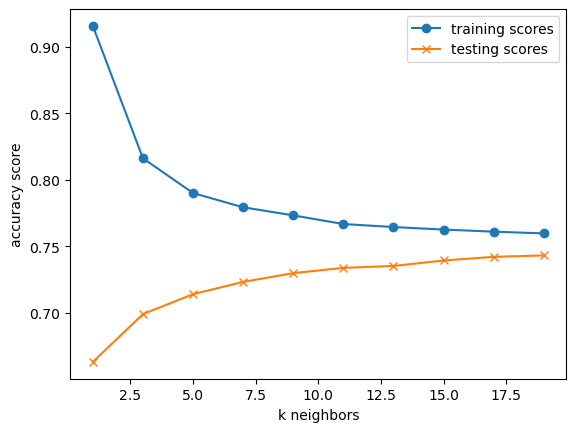

In [26]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_encoded, y_train)
    train_score = knn.score(x_train_encoded, y_train)
    test_score = knn.score(x_test_encoded, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

# Note that k: 15 seems to be the best choice for this dataset

### Create a function to generate the model reports

In [27]:
#create a function that displays the model's accuracy, text and trqining scores, confusion matrix, and classification report

def model_report(model, x_train_encoded, x_test_encoded, y_train, y_test):
    model.fit(x_train_encoded, y_train)
    predictions = model.predict(x_test_encoded)
    
    #print accuracy scores
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {round(accuracy, 3)}")
    #print test and train scores
    print(f"Test score: {round(model.score(x_test_encoded, y_test), 3)}")
    print(f"Train Score: {round(model.score(x_train_encoded, y_train), 3)}")

    # Display the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    cm_df = pd.DataFrame(cm, index=["Actual 0s", "Actual 1s"], columns=["Predicted 0", "Predicted 1"])
    print("Confusion Matrix")
    display(cm_df)
    
    # Display the classification report
    print("Classification Report")
    print(classification_report(y_test, predictions))



In [28]:
#print the best k value
knn = KNeighborsClassifier(n_neighbors=15)

#call the model report function
model_report(knn, x_train_encoded, x_test_encoded, y_train, y_test)


# knn.fit(x_train_encoded, y_train)
# print('k=15 Test Acc: %.3f' % knn.score(x_test_encoded, y_test))



Accuracy: 0.739
Test score: 0.739
Train Score: 0.763
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0s,6239,2608
Actual 1s,1997,6829


Classification Report
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73      8847
         1.0       0.72      0.77      0.75      8826

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.74     17673
weighted avg       0.74      0.74      0.74     17673



### Logistic Regression

In [50]:
#Create and fit the logistic regression model
logistic_regression_model = LogisticRegression(random_state=1, max_iter=100)
logistic_regression_model.fit(x_train_encoded, y_train)
predictions = logistic_regression_model.predict(x_test_encoded)

#call the model report function
model_report(logistic_regression_model, x_train_encoded, x_test_encoded, y_train, y_test)



Accuracy: 0.752
Test score: 0.752
Train Score: 0.745
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0s,6513,2334
Actual 1s,2045,6781


Classification Report
              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75      8847
         1.0       0.74      0.77      0.76      8826

    accuracy                           0.75     17673
   macro avg       0.75      0.75      0.75     17673
weighted avg       0.75      0.75      0.75     17673



0.751145815650993 (ungrouping just age)


### Decision Tree

In [53]:
# create the model
tree_model = tree.DecisionTreeClassifier(random_state=1)
#fit the model
tree_model = tree_model.fit(x_train_encoded, y_train)
# Making predictions using the testing data
predictions = tree_model.predict(x_test_encoded)

#call the model report function
model_report(tree_model, x_train_encoded, x_test_encoded, y_train, y_test)


Accuracy: 0.669
Test score: 0.669
Train Score: 0.93
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0s,6242,2605
Actual 1s,3239,5587


Classification Report
              precision    recall  f1-score   support

         0.0       0.66      0.71      0.68      8847
         1.0       0.68      0.63      0.66      8826

    accuracy                           0.67     17673
   macro avg       0.67      0.67      0.67     17673
weighted avg       0.67      0.67      0.67     17673



### Random Forest

In [49]:
# Train the Random Forest model
clf = RandomForestClassifier(random_state=1, n_estimators=500, max_depth=3).fit(x_train_encoded, y_train)

#call the model report function
model_report(clf, x_train_encoded, x_test_encoded, y_train, y_test)



Accuracy: 0.742
Test score: 0.742
Train Score: 0.735
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0s,6393,2454
Actual 1s,2112,6714


Classification Report
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74      8847
         1.0       0.73      0.76      0.75      8826

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.74     17673
weighted avg       0.74      0.74      0.74     17673



## XGBClassifier

In [37]:
# Create the XGBClassifier model
xgb_model = XGBClassifier(random_state=1, learning_rate=0.05, n_estimators=1000, max_depth=3)

#call the model report function
model_report(xgb_model, x_train_encoded, x_test_encoded, y_train, y_test)

# #create heatmap for confusion matrix
# sns.heatmap(conf_matrix, annot=True, cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show







Accuracy: 0.756
Test score: 0.756
Train Score: 0.754
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0s,6322,2525
Actual 1s,1782,7044


Classification Report
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.75      8847
         1.0       0.74      0.80      0.77      8826

    accuracy                           0.76     17673
   macro avg       0.76      0.76      0.76     17673
weighted avg       0.76      0.76      0.76     17673



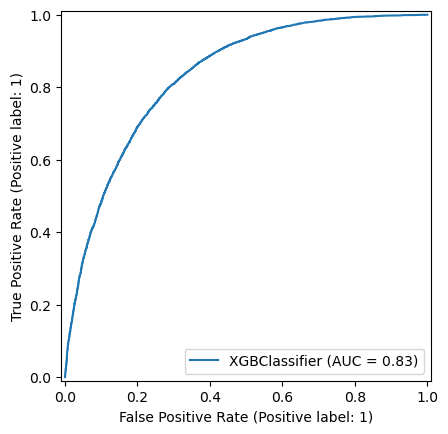

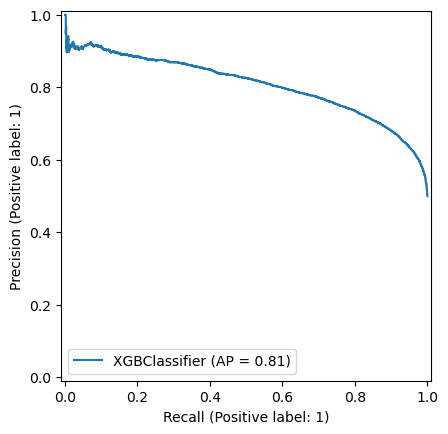

In [38]:
# # Create the ROC curve
RocCurveDisplay.from_estimator(xgb_model, x_test_encoded, y_test)
plt.show()

#Create the precision-recall curve

PrecisionRecallDisplay.from_estimator(xgb_model, x_test_encoded, y_test)
plt.show()

## GridSearchCV for each model

### RF - GridSearch

In [45]:
# Create the parameter grid for the GridSearchCV model running random forest

# Create the parameter grid for the GridSearchCV model running random forest
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 7, 11]
    
}

# Create the GridSearchCV model
#grid_model = GridSearchCV(logistic_regression_model, param_grid, verbose=3)
grid_model = GridSearchCV(RandomForestClassifier(), param_grid, verbose=3)

#call the model report function
model_report(grid_model, x_train_encoded, x_test_encoded, y_train, y_test)

#print best parameters
print(grid_model.best_params_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .....max_depth=3, n_estimators=100;, score=0.741 total time=   0.5s
[CV 2/5] END .....max_depth=3, n_estimators=100;, score=0.727 total time=   0.5s
[CV 3/5] END .....max_depth=3, n_estimators=100;, score=0.731 total time=   0.5s
[CV 4/5] END .....max_depth=3, n_estimators=100;, score=0.735 total time=   0.5s
[CV 5/5] END .....max_depth=3, n_estimators=100;, score=0.740 total time=   0.5s
[CV 1/5] END .....max_depth=3, n_estimators=500;, score=0.742 total time=   2.3s
[CV 2/5] END .....max_depth=3, n_estimators=500;, score=0.728 total time=   2.4s
[CV 3/5] END .....max_depth=3, n_estimators=500;, score=0.732 total time=   2.3s
[CV 4/5] END .....max_depth=3, n_estimators=500;, score=0.731 total time=   2.4s
[CV 5/5] END .....max_depth=3, n_estimators=500;, score=0.739 total time=   2.6s
[CV 1/5] END ....max_depth=3, n_estimators=1000;, score=0.742 total time=   4.7s
[CV 2/5] END ....max_depth=3, n_estimators=1000;,

,Predicted 0,Predicted 1
Actual 0s,6351,2496
Actual 1s,1855,6971


Classification Report
              precision    recall  f1-score   support

         0.0       0.77      0.72      0.74      8847
         1.0       0.74      0.79      0.76      8826

    accuracy                           0.75     17673
   macro avg       0.76      0.75      0.75     17673
weighted avg       0.76      0.75      0.75     17673

{'max_depth': 11, 'n_estimators': 1000}


Accuracy: 0.7536354891642618
{'max_depth': 11, 'n_estimators': 500}
0.7458270566257893
Testing Score: 0.753522322186386


In [46]:

# Create the parameter grid for the GridSearchCV model running logistic regression
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'], 
    'max_iter': [100, 1000, 10000]
}
#C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start

# Create the GridSearchCV model
grid_model = GridSearchCV(LogisticRegression(), param_grid, verbose=3)

#call the model report function
model_report(grid_model, x_train_encoded, x_test_encoded, y_train, y_test)

# Print the best parameters
print(grid_model.best_params_)
print(f"best score {round(grid_model.best_score_, 3)}")
# print(grid_model.best_estimator_)
# print(grid_model.cv_results_)
# print(grid_model.best_index_)
# print(grid_model.scorer_)
# print(grid_model.n_splits_)
# print(grid_model.refit_time_)
# print(grid_model.error_score)
# print(grid_model.param_grid)
# print(grid_model.pre_dispatch)
# print(grid_model.return_train_score)
# print(grid_model.multimetric_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.1, max_iter=100, penalty=l1, solver=liblinear;, score=0.753 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=100, penalty=l1, solver=liblinear;, score=0.738 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=100, penalty=l1, solver=liblinear;, score=0.743 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l1, solver=liblinear;, score=0.743 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l1, solver=liblinear;, score=0.745 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.753 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.738 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.743 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.743 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.7

,Predicted 0,Predicted 1
Actual 0s,6513,2334
Actual 1s,2045,6781


Classification Report
              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75      8847
         1.0       0.74      0.77      0.76      8826

    accuracy                           0.75     17673
   macro avg       0.75      0.75      0.75     17673
weighted avg       0.75      0.75      0.75     17673

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
best score 0.744


In [47]:
# Create the parameter grid for the GridSearchCV model running KNeighborsClassifier
param_grid = {
    'n_neighbors': [15], 
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create the GridSearchCV model
grid_model = GridSearchCV(KNeighborsClassifier(), param_grid, verbose=3)

#call the model report function
model_report(grid_model, x_train_encoded, x_test_encoded, y_train, y_test)

# Print the best parameters
print(grid_model.best_params_)
print(f"best score {round(grid_model.best_score_, 3)}")
# print(grid_model.best_estimator_)
# print(grid_model.cv_results_)
# print(grid_model.best_index_)
# print(grid_model.scorer_)
# print(grid_model.n_splits_)
# print(grid_model.refit_time_)
# print(grid_model.error_score)
# print(grid_model.param_grid)
# print(grid_model.pre_dispatch)
# print(grid_model.return_train_score)
# print(grid_model.multimetric_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=15, weights=uniform;, score=0.741 total time=   1.3s
[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=15, weights=uniform;, score=0.726 total time=   1.2s
[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=15, weights=uniform;, score=0.733 total time=   1.2s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=15, weights=uniform;, score=0.730 total time=   1.2s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=15, weights=uniform;, score=0.734 total time=   1.3s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=15, weights=distance;, score=0.723 total time=   1.2s
[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=15, weights=distance;, score=0.712 total time=   1.1s
[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=15, weights=distance;, score=0.717 total time=   1.1s
[CV 4/5] END algorithm=auto, metric=eucl

,Predicted 0,Predicted 1
Actual 0s,6239,2608
Actual 1s,1997,6829


Classification Report
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73      8847
         1.0       0.72      0.77      0.75      8826

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.74     17673
weighted avg       0.74      0.74      0.74     17673

{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}
best score 0.733


In [ ]:

# Create the parameter grid for the GridSearchCV model running Xgboost
param_grid = {
  #random_state=1, learning_rate=0.05, n_estimators=1000, max_depth=3
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 7, 11]  
}
#parameters used above: (random_state=1, learning_rate=0.05, n_estimators=1000, max_depth=3)

# Create the GridSearchCV model
grid_model = GridSearchCV(XGBClassifier(), param_grid, verbose=3)

#call the model report function
model_report(grid_model, x_train_encoded, x_test_encoded, y_train, y_test)

# Print the best parameters
print(grid_model.best_params_)
print(f"best score {round(grid_model.best_score_, 3)}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.754 total time=   0.1s
[CV 2/5] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.743 total time=   0.1s
[CV 3/5] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.746 total time=   0.1s
[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.742 total time=   0.1s
[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.748 total time=   0.1s
[CV 1/5] END learning_rate=0.05, max_depth=3, n_estimators=500;, score=0.756 total time=   0.4s
[CV 2/5] END learning_rate=0.05, max_depth=3, n_estimators=500;, score=0.743 total time=   0.4s
[CV 3/5] END learning_rate=0.05, max_depth=3, n_estimators=500;, score=0.747 total time=   0.4s
[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=500;, score=0.744 total time=   0.4s
[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=500;, score=0.7

,Predicted 0,Predicted 1
Actual 0s,6317,2530
Actual 1s,1798,7028


Classification Report
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      8847
         1.0       0.74      0.80      0.76      8826

    accuracy                           0.76     17673
   macro avg       0.76      0.76      0.75     17673
weighted avg       0.76      0.76      0.75     17673

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
best score 0.748


In [52]:
# Create the parameter grid for the GridSearchCV model running DecisionTree

# Create the parameter grid for the GridSearchCV model running DecisionTree
param_grid = {
    'max_depth': [3, 7, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV model
grid_model = GridSearchCV(DecisionTreeClassifier(), param_grid, verbose=3)

#call the model report function
model_report(grid_model, x_train_encoded, x_test_encoded, y_train, y_test)

# Print the best parameters
print(grid_model.best_params_)
print(f"best score {round(grid_model.best_score_, 3)}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.715 total time=   0.1s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.709 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.717 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.709 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.716 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.715 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.709 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.717 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.709 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=1, m

,Predicted 0,Predicted 1
Actual 0s,6336,2511
Actual 1s,1995,6831


Classification Report
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      8847
         1.0       0.73      0.77      0.75      8826

    accuracy                           0.75     17673
   macro avg       0.75      0.75      0.74     17673
weighted avg       0.75      0.75      0.74     17673

{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
best score 0.738
